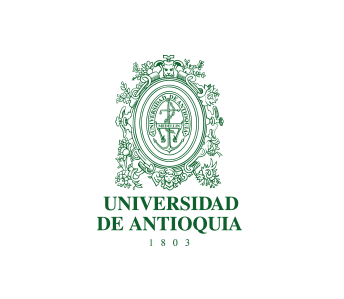

# Análisis Estadístico de Señales

Estudiantes:
- Juan Camilo Carvajal Sierra - 1010124738
- Ana María Uribe Betancur - 1000537653
- Duvan Vega Cardona - 1003896233

## OBJETIVOS

### General
Aplicar técnicas para el anàlisis de señales biomédicas en el dominio del tiempo mediante técnicas estadísticas.

### Específicos
- Comprender las características que diferencian las señales determinísticas de las estocásticas.
- Implementar diferentes técnicas para el análisis estadístico de señales, e interpretar los resultados obtenidos.

### 2. Análisis estadístico de EEG

Se cuenta con señales de EEG de dos grupos de personas, un grupo control y un grupo de pacientes con enfermedad de Parkinson. Se tiene evidencia que la energía de las señales de EEG puede conducir a diferenciar entre señales de pacientes con enfermedad de Parkinson y sanos. Se pide calcular la Energía promedio por grupo poblacional de cada canal.

1. Implemente una función que reciba una señal de múltiples canales y épocas y calcule la Energía de promedio de cada canal.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.stats as sis
import statsmodels.tsa.stattools as sta
import pandas as pd
import os

In [ ]:
def rutas_pacientes(ruta):
    r_c = []
    r_p = []
    r_control = ruta+'\\control\\'
    r_control = os.listdir(r_control)
    r_park = ruta+'\\parkinson\\'
    r_park = os.listdir(r_park)
    for i in range(len(r_control)):
        r_c.append(ruta+'\\'+'control'+'\\'+r_control[i])
    for k in range(len(r_park)):
        r_p.append(ruta+'\\'+'parkinson'+'\\'+r_park[k])
    return r_c,r_p

def senal_continua(matriz,sensores,puntos,epocas):
    s_c = np.reshape(matriz,(sensores,puntos*epocas),order = 'F')
    return s_c
def energia_prom(señal):
    energia_epoca = np.sum(señal**2)
    energia_prom_canal = np.mean(energia_epoca)
    return energia_prom_canal
def energia_prom_continua(senalcontinua):
    energia = []
    for i in range(len(senalcontinua)):
        energia_canal = senalcontinua[i]
        valor = energia_prom(energia_canal)
        energia.append(valor)
    return energia

def analizar_paciente(ruta_c,ruta_p):
    df_c = {}
    df_p = {}
    for i in range(len(ruta_c)):
        datos_control = sio.loadmat(ruta_c[i])
        control = datos_control['data']
        senal_control = senal_continua(control,control.shape[0],control.shape[1],control.shape[2])
        eng_c = energia_prom_continua(senal_control)
        df_c['Sujeto {}'.format(i+1)] = eng_c
    for k in range(len(ruta_p)):
        datos_parkinson = sio.loadmat(ruta_p[k])
        parkinson = datos_parkinson['data']
        senal_parkinson = senal_continua(parkinson,parkinson.shape[0],parkinson.shape[1],parkinson.shape[2])
        eng_p = energia_prom_continua(senal_parkinson)
        df_p['Sujeto {}'.format(k+1)] = eng_p
    return df_c,df_p

2. Calcule la energía de cada canal promediada por épocas para cada sujeto, esto para ambos grupos poblacionales. Guarde esta información en un DataFrame de columnas ‘canal’ y filas ‘#sujeto’ con los valores de energía calculados, un DataFrame para cada grupo poblacional.

In [ ]:
c,p = rutas_pacientes('.')
data_c,data_p = analizar_paciente(c,p)
data_c = pd.DataFrame(data_c)
data_c = data_c.transpose()
data_c.columns = [f'Canal {i+1}' for i in range(len(data_c.columns))]


data_p = pd.DataFrame(data_p)
data_p = data_p.transpose()
data_p.columns = [f'Canal {i+1}' for i in range(len(data_p.columns))]


print("_ "*59)
print("Energía Promedio por Canales (Pacientes Control)")
display(data_c)
print("_ "*59)
print("Energía Promedio por Canales (Pacientes Parkinson)")
display(data_p)

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Energía Promedio por Canales (Pacientes Control)


,Canal 1,Canal 2,Canal 3,Canal 4,Canal 5,Canal 6,Canal 7,Canal 8
Sujeto 1,3.863817e+06,3.777463e+06,4.096827e+06,3.331015e+06,5.351429e+06,4.543948e+06,4.100639e+06,4.438548e+06
Sujeto 2,2.810087e+06,3.100735e+06,3.661669e+06,3.459174e+06,2.935501e+06,1.652535e+07,1.176780e+07,1.332058e+07
Sujeto 3,2.065706e+06,2.669464e+06,4.197490e+06,2.083526e+06,4.202967e+06,2.140567e+06,2.327262e+06,2.846985e+06
Sujeto 4,5.261384e+06,5.202586e+06,5.781264e+06,5.278628e+06,5.349915e+06,1.588312e+07,1.592595e+07,1.676559e+07
Sujeto 5,3.109819e+06,3.316066e+06,3.513181e+06,3.667147e+06,3.923135e+06,8.918458e+06,6.299323e+06,7.235272e+06
Sujeto 6,2.280159e+06,2.409063e+06,2.805886e+06,2.132205e+06,2.432432e+06,4.457695e+06,3.794886e+06,3.949206e+06
Sujeto 7,1.522867e+06,1.488978e+06,1.732233e+06,1.461342e+06,1.404831e+06,2.918778e+06,2.107077e+06,3.728355e+06
Sujeto 8,4.939344e+06,4.533437e+06,3.007432e+06,2.983317e+06,4.533702e+06,1.442312e+07,8.843951e+06,1.173846e+07
Sujeto 9,1.570882e+06,1.584835e+06,1.999743e+06,1.859255e+06,1.800475e+06,7.969942e+06,7.859678e+06,8.614854e+06
Sujeto 10,8.254147e+06,9.643865e+06,9.150205e+06,6.069465e+06,5.356071e+06,3.973300e+07,3.935593e+07,5.638018e+07


_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Energía Promedio por Canales (Pacientes Parkinson)


,Canal 1,Canal 2,Canal 3,Canal 4,Canal 5,Canal 6,Canal 7,Canal 8
Sujeto 1,1.778669e+06,1.610348e+06,1.547208e+06,1.357039e+06,1.729022e+06,3.260145e+06,3.389189e+06,3.661667e+06
Sujeto 2,2.483401e+06,1.656221e+06,1.695516e+06,2.040455e+06,2.354064e+06,8.829716e+06,7.412734e+06,9.163702e+06
Sujeto 3,6.628026e+06,7.582116e+06,7.304519e+06,7.258460e+06,8.093390e+06,4.378699e+07,3.120611e+07,4.565085e+07
Sujeto 4,3.632576e+06,3.376711e+06,3.754668e+06,3.336002e+06,3.456934e+06,1.963208e+07,1.971994e+07,2.337829e+07
Sujeto 5,6.800433e+06,7.252914e+06,1.024407e+07,8.359078e+06,7.917305e+06,4.019481e+07,3.118441e+07,4.946372e+07
Sujeto 6,2.316946e+06,1.876767e+06,2.000380e+06,1.823540e+06,2.257216e+06,7.254423e+06,7.256140e+06,1.053825e+07
Sujeto 7,1.571863e+06,1.593655e+06,1.786695e+06,3.551768e+06,2.174009e+06,6.365515e+06,6.256458e+06,5.739464e+06
Sujeto 8,1.823584e+06,2.009799e+06,2.650332e+06,2.226166e+06,1.694661e+06,5.805247e+06,6.274346e+06,9.199292e+06
Sujeto 9,1.686399e+06,2.465509e+06,1.687705e+06,1.649839e+06,1.435270e+06,5.098869e+06,7.164238e+06,6.445975e+06
Sujeto 10,3.525152e+06,3.574548e+06,4.564428e+06,3.410445e+06,2.969915e+06,9.709053e+06,9.022372e+06,8.707716e+06


3. Determine si existe diferencia estadística entre canales de cada grupo de sujetos a través de una prueba t. Compruebe los supuestos necesarios para realizar una prueba t, esto es: Normalidad de la variable, independencia (se asume que los grupos son independientes), y homocedasticidad (use una prueba de Levene), finalmente realice la prueba t para determinar si existen diferencias entre los canales entre grupos de sujetos. De no cumplirse los requisitos, realice entonces un análisis no paramétrico (prueba U de Mann-Whitney). Este numeral tiene como objetivo identificar los canales que entregan información diferencial entre pacientes Sanos y con enfermedad de Parkinson.

In [ ]:
diccionario_control = {}
for i in range(len(data_c.columns)):
    diccionario_control[f"Canal {i+1}"]=np.array(data_c[f"Canal {i+1}"])

diccionario_parkinson = {}
for i in range(len(data_p.columns)):
    diccionario_parkinson[f"Canal {i+1}"]=np.array(data_p[f"Canal {i+1}"])

***
#### Supuestos de pruebas Estadísticas (Normalidad)
Para evaluar el supuesto de normalidad en los datos de energía por canal, se aplicó la prueba de Shapiro-Wilk de forma independiente para cada canal y para cada grupo de sujetos (Control y Parkinson).

- Hipótesis nula (H₀): los datos provienen de una distribución normal.

- Hipótesis alternativa (H₁): los datos no provienen de una distribución normal.

Se utilizó un nivel de significancia de α = 0.05.

- Si p > 0.05, no se rechaza H₀, lo cual indica que los datos pueden considerarse normales.

- Si p ≤ 0.05, se rechaza H₀, indicando que los datos no siguen una distribución normal.
***

In [ ]:
shapiro_control = {}
for i in range(len(data_c.columns)):
    _,valor_p = sis.shapiro(diccionario_control[f"Canal {i+1}"])
    shapiro_control[f"Canal {i+1}"] = valor_p
for i in range(len(shapiro_control)):
    print(f"Control - Prueba Shapiro-Wilk Canal {i+1}: {shapiro_control[f"Canal {i+1}"]}")

Control - Prueba Shapiro-Wilk Canal 1: 0.018734201543374407
Control - Prueba Shapiro-Wilk Canal 2: 0.01746312958074201
Control - Prueba Shapiro-Wilk Canal 3: 0.014804755276210366
Control - Prueba Shapiro-Wilk Canal 4: 0.0007584291293278646
Control - Prueba Shapiro-Wilk Canal 5: 0.0038476065918870007
Control - Prueba Shapiro-Wilk Canal 6: 1.8601628490639276e-05
Control - Prueba Shapiro-Wilk Canal 7: 1.1996051263702335e-05
Control - Prueba Shapiro-Wilk Canal 8: 9.757635285014224e-07


In [ ]:
shapiro_parkinson = {}
for i in range(len(data_p.columns)):
    _,valor_p = sis.shapiro(diccionario_parkinson[f"Canal {i+1}"])
    shapiro_parkinson[f"Canal {i+1}"] = valor_p
for i in range(len(shapiro_control)):
    print(f"Parkinson - Prueba Shapiro-Wilk Canal {i+1}: {shapiro_parkinson[f"Canal {i+1}"]}")

Parkinson - Prueba Shapiro-Wilk Canal 1: 0.0102329820267886
Parkinson - Prueba Shapiro-Wilk Canal 2: 0.004192413269198875
Parkinson - Prueba Shapiro-Wilk Canal 3: 0.003101648445434879
Parkinson - Prueba Shapiro-Wilk Canal 4: 0.0005076193389565655
Parkinson - Prueba Shapiro-Wilk Canal 5: 0.0023245610839229946
Parkinson - Prueba Shapiro-Wilk Canal 6: 5.6122901219081376e-06
Parkinson - Prueba Shapiro-Wilk Canal 7: 1.0108391908693353e-05
Parkinson - Prueba Shapiro-Wilk Canal 8: 5.129495234295952e-06


***
#### Supuesto de Homocedasticidad (Prueba de Levene, α = 0.05)

Para evaluar el supuesto de homocedasticidad, es decir, la igualdad de varianzas entre grupos, se aplicó la prueba de Levene de forma independiente para cada canal. Esta prueba permite determinar si la dispersión de los datos (energía por canal) es similar entre el grupo de sujetos sanos y el grupo de sujetos con enfermedad de Parkinson.

- Hipótesis nula (H₀): las varianzas de ambos grupos son iguales.

- Hipótesis alternativa (H₁): las varianzas entre grupos son diferentes.

Se utilizó un nivel de significancia de α = 0.05:

- Si p > 0.05, no se rechaza H₀, lo cual indica que puede asumirse igualdad de varianzas entre grupos.

- Si p ≤ 0.05, se rechaza H₀, indicando que las varianzas difieren significativamente entre los grupos.
***

In [ ]:
levene_data = {}
for i in range(len(data_c.columns)):
    canal = f"Canal {i+1}"
    datos_control = diccionario_control[canal]
    datos_parkinson = diccionario_parkinson[canal]
    _,valor_p = sis.levene(datos_control,datos_parkinson)
    levene_data[canal] = valor_p

for i in range(len(levene_data)):
    canal = f"Canal {i+1}"
    print(f"Prueba de Levene - {canal}: Valor P = {levene_data[canal]}")

Prueba de Levene - Canal 1: Valor P = 0.9131972737769418
Prueba de Levene - Canal 2: Valor P = 0.6416812420608209
Prueba de Levene - Canal 3: Valor P = 0.640381496752782
Prueba de Levene - Canal 4: Valor P = 0.47202574988131896
Prueba de Levene - Canal 5: Valor P = 0.6807345429389329
Prueba de Levene - Canal 6: Valor P = 0.5089768550907314
Prueba de Levene - Canal 7: Valor P = 0.6676163812528264
Prueba de Levene - Canal 8: Valor P = 0.6408975626172075


Ya que todos los valores $\alpha >$ 0,05. No se rechaza la hipótesis nula de la prueba de Levene, lo que significa que las varianzas de los dos grupos (Control y Parkinson) son estadísticamente iguales para cada canal. Gracias a esto, se cumple el supuesto de homocedasticidad, que es uno de los requisitos clave para poder aplicar la prueba t de Student para muestras independientes. Sin embargo no comprobamos normalidad, por lo que se debe hacer una prueba no paramétrica.



***
#### Supuestos – Prueba no paramétrica U de Mann-Whitney (α = 0.05)

Para aplicar la prueba U de Mann-Whitney, se deben cumplir los siguientes supuestos:

- Independencia: Los grupos de sujetos (Control y Parkinson) son independientes entre sí.

- Escala de medición: La variable de interés (energía por canal) es continua, por lo tanto, adecuada para la prueba.

- Distribuciones de forma similar: Aunque la prueba no exige normalidad, se asume que las distribuciones entre grupos tienen formas similares para garantizar una comparación adecuada de las medianas.

Con base en lo anterior, se procede a aplicar la prueba de Mann-Whitney para cada canal, considerando un nivel de significancia de α = 0.05. Se establece la siguiente hipótesis:

- H₀: Las distribuciones de energía entre los grupos Control y Parkinson son iguales.

- H₁: Las distribuciones de energía entre los grupos Control y Parkinson son diferentes.

Se rechaza la hipótesis nula si el valor p obtenido es menor o igual a 0.05.
***

In [ ]:
mannwhitney_data = {}
for i in range(len(data_c.columns)):
    canal = f"Canal {i+1}"
    datos_control = diccionario_control[canal]
    datos_parkinson = diccionario_parkinson[canal]
    _,valor_p = sis.mannwhitneyu(datos_control,datos_parkinson,alternative='two-sided')
    mannwhitney_data[canal] = valor_p

for i in range(len(mannwhitney_data)):
    print(f"Prueba U de Mann-Whitney - Canal {i+1}: {mannwhitney_data[f'Canal {i+1}']}")

Prueba U de Mann-Whitney - Canal 1: 0.8581496425719736
Prueba U de Mann-Whitney - Canal 2: 0.993799802489995
Prueba U de Mann-Whitney - Canal 3: 0.7149389423957258
Prueba U de Mann-Whitney - Canal 4: 0.6804447598890155
Prueba U de Mann-Whitney - Canal 5: 0.9442431184775393
Prueba U de Mann-Whitney - Canal 6: 0.47947359009814694
Prueba U de Mann-Whitney - Canal 7: 0.29414686448863514
Prueba U de Mann-Whitney - Canal 8: 0.3086853623027932


De acuerdo con los resultados de la prueba U de Mann-Whitney, ninguno de los canales presenta diferencias estadísticamente significativas en la distribución de energía entre los sujetos sanos y con enfermedad de Parkinson, ya que todos los valores p son mayores a 0.05.

Esto sugiere que, con los datos actuales y esta métrica (energía), ningún canal aporta información diferencial suficiente para discriminar entre los dos grupos mediante esta prueba.

***
## Conclusiones

### 1. Prueba de Normalidad (Shapiro-Wilk)
- **Resultados:** Todos los p-valores obtenidos, tanto para el grupo control como para el grupo con Parkinson, fueron menores a 0.05.
- **Interpretación:** Se rechaza la hipótesis nula de normalidad en todos los canales.
- **Conclusión:** Los datos no siguen una distribución normal en ninguno de los canales, ni en el grupo control ni en el grupo Parkinson.

### 2. Prueba de Homocedasticidad (Levene)
- **Resultados:** Todos los p-valores fueron mayores a 0.05.
- **Interpretación:** No se rechaza la hipótesis nula de igualdad de varianzas entre los grupos.
- **Conclusión:** Se cumple el supuesto de homogeneidad de varianzas en todos los canales.

### 3. Prueba de Diferencias entre Grupos (Mann-Whitney U)
- **Resultados:** Todos los p-valores fueron mayores a 0.05.
- **Interpretación:** No se encontró evidencia significativa de diferencias entre los grupos control y Parkinson en ningún canal.
- **Conclusión:** No existen diferencias estadísticamente significativas entre los grupos en cuanto a la energía en los 8 canales, según esta prueba no paramétrica.

***

## Interpretación General

Dado que el objetivo de este análisis era identificar canales de EEG que aporten información diferencial entre sujetos sanos y sujetos con enfermedad de Parkinson, se concluye que **no se identificó ningún canal con diferencias significativas** entre los grupos con base en la métrica analizada (energía).

Este resultado puede deberse a varios factores, entre ellos:

- La métrica utilizada (energía) podría no ser suficientemente sensible para capturar diferencias relevantes entre los grupos.
- El tamaño muestral es relativamente pequeño, lo cual puede limitar la potencia estadística del análisis.